The number of timesteps is 98
[2.4882946700000004e-20, 0.0, 2.4882946700000004e-20, 2.4882890100000002e-20, 2.4882912799999996e-20, 2.4882946700000004e-20, 2.4882919199999998e-20, 2.80474683e-20, 2.4882920799999997e-20, 2.8046179100000003e-20, 4.96358257e-20, 4.9765809399999995e-20, 4.43560708e-20, 4.9765815800000003e-20, 4.27719004e-20, 4.9765812599999993e-20, 4.9765809399999995e-20, 4.89137907e-20, 7.464871400000001e-20, 6.724966099999999e-20, 7.464869469999999e-20, 7.46486817e-20, 6.71666974e-20, 7.464871400000001e-20, 6.69134832e-20, 7.464871400000001e-20, 7.464871400000001e-20, 6.74550732e-20, 7.46487205e-20, 6.66486949e-20, 7.464871400000001e-20, 7.464871400000001e-20, 6.76713293e-20, 7.464871400000001e-20, 6.64565241e-20, 7.464871400000001e-20, 7.464871400000001e-20, 6.78143216e-20, 7.46487205e-20, 6.63377332e-20, 7.464871400000001e-20, 7.460747130000001e-20, 6.78838242e-20, 7.464871400000001e-20, 6.62911073e-20, 7.46487205e-20, 7.458548639999999e-20, 6.787966239999999e-20, 7.46

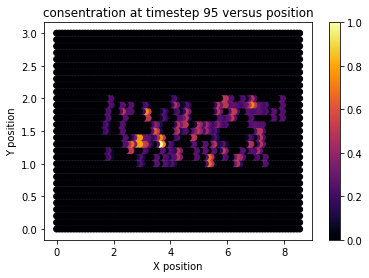

In [42]:
import pdb
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

DATA_FILE = "/home/david/dev/SmokeDetectorOptimization/exportUSLab.csv" # Points to the data Katie gave us
all_points = [[]] # This is a doubly-nested list with each internal list representing a single timestep

with open(DATA_FILE, 'r') as infile: # read through line by line and parse by the time
    for line in infile:
        if "symmetry" in line:
            all_points.append([line])
        all_points[-1].append(line)  
       
print("The number of timesteps is {}".format(len(all_points)))

plt.cla()

all_times = []
max_consentrations = []
for time in all_points[1:-1]: #only do a few at the end for speed reasons
    df = pd.read_csv(io.StringIO('\n'.join(time[4:])))#
    df = df.rename(columns={'Node Number': 'N',
                  ' X [ m ]' : 'X',
                  ' Y [ m ]' : 'Y',
                  ' Z [ m ]' : 'Z',
                  ' Particle Mass Concentration [ kg m^-3 ]' : 'C'})
    all_times.append(df)
    consentration = df['C'].values[0:-1] # get all of the consentrations but the null last one
    max_consentrations.append(np.max(consentration))

print(max_consentrations)
max_consentration = max(max_consentrations)
print(max_consentration)

for i, df in enumerate(all_times): 

    plt.cla()
    plt.clf()
    plt.xlabel("X position")
    plt.ylabel("Y position")
    plt.title("consentration at timestep {} versus position".format(i))
    norm = mpl.colors.Normalize(vmin=0, vmax=1.0)
    cb = plt.scatter(df['X'], df['Y'], c=df['C'] / max_consentration, cmap=plt.cm.inferno, norm=norm)
    plt.colorbar(cb) # Add a colorbar to a plot
    plt.savefig("vis/consentration{:03d}.png".format(i))

print(len(all_times))
    

So the next thing we want to do is convert the output to a 2d space

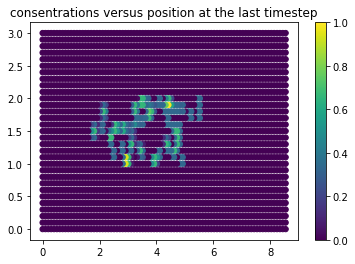

0
(388,)


TypeError: only integer scalar arrays can be converted to a scalar index

In [12]:
import numpy as np
# starting with a really bad iterative method
last_consentrations = all_times[-1] # get the last 

max_val = np.max(last_consentrations['C'].values[0:-1])

cb = plt.scatter(last_consentrations['X'], last_consentrations['Y'], c=last_consentrations['C'] / max_val, s = 28)
plt.colorbar(cb) # Add a colorbar to a plot
plt.title("consentrations versus position at the last timestep")
plt.pause(.2)

consentrations = np.asarray([x['C'].values[:-1] for x in all_times])
alarmed = consentrations > 2e-21
nonzero = np.nonzero(alarmed.transpose())
for i in range(alarmed.shape[0]):
    print(i)
    same = i == nonzero[1]
    print(same.shape)
    print(nonzero[same])
#print(nonzero[1])

In [5]:

def make_lookup(data_frame):
    """Returns a function which searches 
    the data at the sample nearest a given point
    """
    X = data_frame['X'].values[0:-1]
    Y = data_frame['Y'].values[0:-1]
    C = data_frame['C'].values[0:-1]
    best = np.argmax(C)
    XY = np.vstack((X,Y)).transpose()
    print(XY[best,:])
    def ret_func(xy):
        diff = xy - XY
        dist = np.linalg.norm(diff, axis=1)
        loc = np.argmin(dist)
        closest_c = C[loc]
        return closest_c
    return ret_func
ret_func = make_lookup(df)

print(ret_func(np.array([3.61694121, 1.29999995])))

[3.61694121 1.29999995]
9.953158640000001e-20


In [3]:
from scipy.optimize import minimize, rosen, rosen_der

BOUNDS = (0.2, 2.0) # constraints on inputs
INIT = (4,2)
res = minimize(ret_func, INIT, method='SLSQP', bounds=((0,8),(0, 3)))
print(res)


NameError: name 'ret_func' is not defined